/Users/nishant/opt/anaconda3/envs/wcs3/lib/python3.8/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


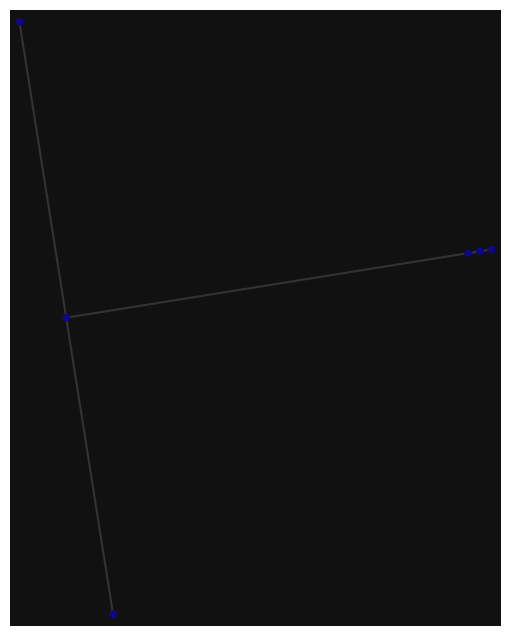

In [24]:
import osmnx as ox
import matplotlib.pyplot as plt

# Configure OSMnx to use footprints and nodes
ox.config(use_cache=True, log_console=True)

# Define the location
location_point = (37.79, -122.41)  # Example: part of San Francisco

# Create the graph from OSM data
G = ox.graph_from_point(location_point, dist=120, network_type='drive')

# Calculate the basic network stats
stats = ox.basic_stats(G)
k_avg = stats['k_avg']
streets_per_node_avg = stats['streets_per_node_avg']

# Visualize the network
nc = ox.plot.get_node_colors_by_attr(G, 'street_count', cmap='plasma')
fig, ax = ox.plot_graph(G, node_color=nc, node_size=30, edge_linewidth=1.5, edge_color='#333333')

plt.show()

Average node degree (k_avg): 2.127659574468085
Average streets per node: 2.25531914893617


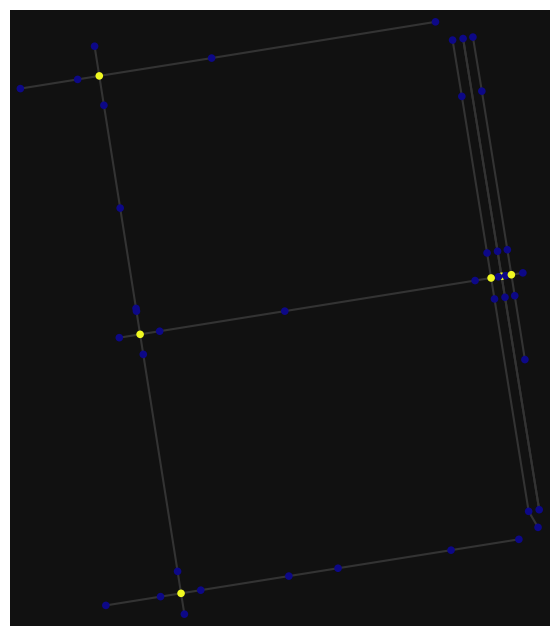

{'n': 47, 'm': 50, 'k_avg': 2.127659574468085, 'edge_length_total': 1441.5729999999999, 'edge_length_avg': 28.831459999999996, 'streets_per_node_avg': 2.25531914893617, 'streets_per_node_counts': {0: 0, 1: 0, 2: 41, 3: 0, 4: 6}, 'streets_per_node_proportions': {0: 0.0, 1: 0.0, 2: 0.8723404255319149, 3: 0.0, 4: 0.1276595744680851}, 'intersection_count': 47, 'street_length_total': 1250.429, 'street_segment_count': 46, 'street_length_avg': 27.183239130434785, 'circuity_avg': 1.0000020017123705, 'self_loop_proportion': 0.0}


In [44]:
# Calculate the basic network stats
stats = ox.basic_stats(G)
k_avg = stats['k_avg']
streets_per_node_avg = stats['streets_per_node_avg']

# Print calculated averages
print(f"Average node degree (k_avg): {k_avg}")
print(f"Average streets per node: {streets_per_node_avg}")

# Generate colors based on streets per node (street_count attribute)
nc = ox.plot.get_node_colors_by_attr(G, 'street_count', cmap='plasma')

# Plot the graph with node colors reflecting streets per node
fig, ax = ox.plot_graph(G, node_color=nc, node_size=30, edge_linewidth=1.5, edge_color='#333333')

plt.show()
print (ox.basic_stats(G))

Average node degree (k_avg): 2.127659574468085
Average streets per node: 2.25531914893617


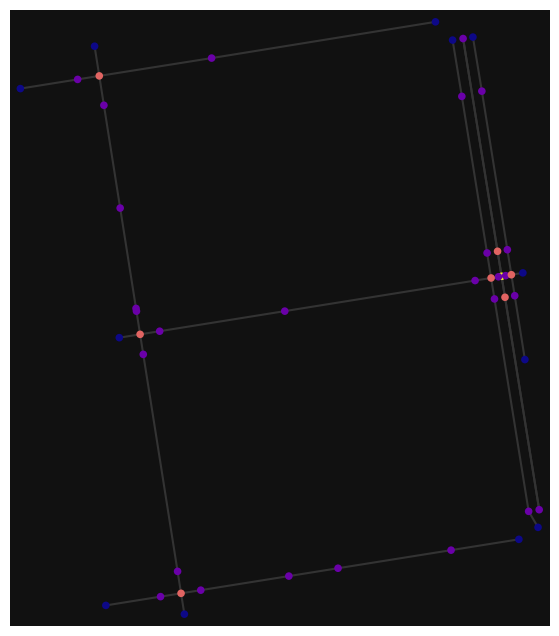

{'n': 47, 'm': 50, 'k_avg': 2.127659574468085, 'edge_length_total': 1441.5729999999999, 'edge_length_avg': 28.831459999999996, 'streets_per_node_avg': 2.25531914893617, 'streets_per_node_counts': {0: 0, 1: 0, 2: 41, 3: 0, 4: 6}, 'streets_per_node_proportions': {0: 0.0, 1: 0.0, 2: 0.8723404255319149, 3: 0.0, 4: 0.1276595744680851}, 'intersection_count': 47, 'street_length_total': 1250.429, 'street_segment_count': 46, 'street_length_avg': 27.183239130434785, 'circuity_avg': 1.0000020017123705, 'self_loop_proportion': 0.0}


In [45]:

# Calculate the node degree for each node
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'degree')

# Calculate the basic network stats
stats = ox.basic_stats(G)
k_avg = stats['k_avg']
streets_per_node_avg = stats['streets_per_node_avg']

# Print calculated averages
print(f"Average node degree (k_avg): {k_avg}")
print(f"Average streets per node: {streets_per_node_avg}")

# Generate colors based on node degree
nc = ox.plot.get_node_colors_by_attr(G, 'degree', cmap='plasma')

# Plot the graph with node colors reflecting degree
fig, ax = ox.plot_graph(G, node_color=nc, node_size=30, edge_linewidth=1.5, edge_color='#333333')

plt.show()
print (ox.basic_stats(G))

In [48]:
a = []
for e in (G.edges()):
    a.append(G.edges[e[0], e[1],0]["oneway"])
# G.edges[(9835201213, 65303546, 0)]

In [49]:
from collections import Counter
Counter(a)

Counter({True: 42, False: 8})

In [53]:
data = list(G.nodes().items())

# Lists to store colors and sizes for each node
node_colors = []
node_sizes = []

for _, attributes in data:
    if 'highway' in attributes:
        if attributes['highway'] == 'traffic_signals':
            node_colors.append('red')
            node_sizes.append(100)  # size for traffic signal
        elif attributes['highway'] == 'crossing':
            node_colors.append('blue')
            node_sizes.append(100)  # size for crossings
        else:
            node_colors.append('gray')  # default node color
            node_sizes.append(25)  # default size
    else:
        node_colors.append('purple')  # default node color
        node_sizes.append(25)  # default size


In [54]:
node_colors

['red',
 'red',
 'red',
 'red',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'red',
 'purple',
 'purple',
 'red',
 'purple',
 'purple',
 'purple',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'purple',
 'purple',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

In [10]:
# ! pip install smartprint
from smartprint import smartprint as sprint
# sprint (k_avg)
sprint (streets_per_node_avg)
m = len(G.edges)
n = len(G.nodes)
sprint (m, n, m/n)

k_avg : 1.6666666666666667
streets_per_node_avg : 4.0
m, n, m/n : 5 6 0.8333333333333334


## Analysis of Road Network Metrics

For both directed and undirected Manhattan-style road networks, we calculate:
- **Average degree** ($k_{\text{avg}}$)
- **Average streets per node** ($\text{streets\_per\_node\_avg}$)
- **Edge-to-node ratio** ($m/n$)

### Directed Graph Metrics:
- **$k_{\text{avg}}$:** 2.6
- **$\text{streets\_per\_node\_avg}$:** 1.3
- **$m/n$ ratio:** 1.3

### Undirected Graph Metrics:
- **$k_{\text{avg}}$:** 2.6
- **$\text{streets\_per\_node\_avg}$:** 2.6
- **$m/n$ ratio:** 1.3

#### Analysis:
- **Directed Graph**: The $k_{\text{avg}}$ is higher than $\text{streets\_per\_node\_avg}$ because in a directed graph, $k_{\text{avg}}$ counts both incoming and outgoing connections, while $\text{streets\_per\_node\_avg}$ counts unique connections without considering directionality.
- **Undirected Graph**: Both $k_{\text{avg}}$ and $\text{streets\_per\_node\_avg}$ are equal, reflecting the bidirectional nature of each connection.
- The $m/n$ ratios are consistent across both graphs as the total number of connections relative to nodes remains unchanged by the directionality of the graph.


Directed Graph Metrics:
k_avg: 5.2
streets_per_node_avg: 2.6
m/n ratio: 2.6


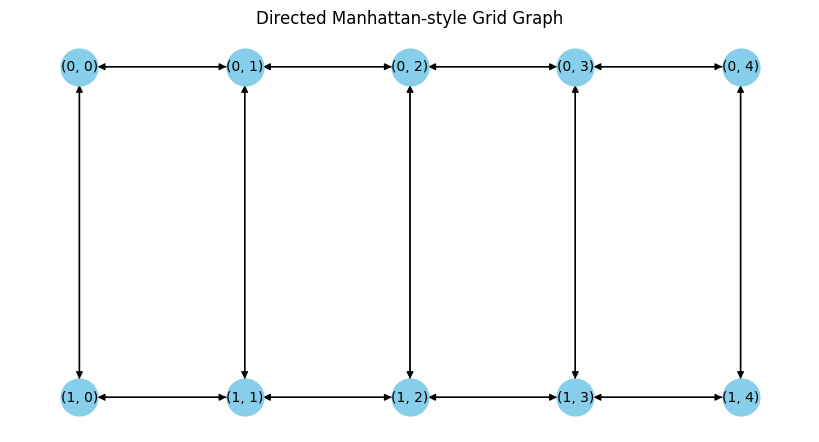


Undirected Graph Metrics:
k_avg: 2.6
streets_per_node_avg: 2.6
m/n ratio: 1.3


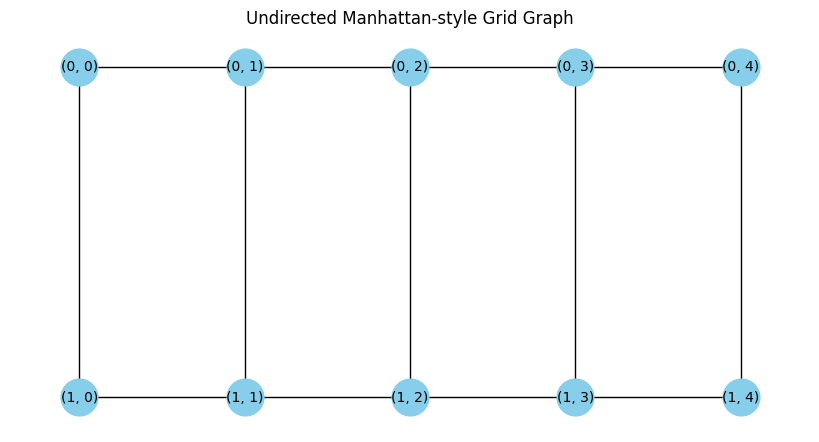

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed Manhattan-style graph
G_directed = nx.grid_2d_graph(2, 5, create_using=nx.DiGraph())

# Create an undirected Manhattan-style graph
G_undirected = nx.grid_2d_graph(2, 5)

# Function to calculate network metrics
def calculate_metrics(G):
    m = len(G.edges())
    n = len(G.nodes())
    k_avg = 2 * m / n  # Times 2 because each edge contributes to the degree of two nodes
    streets_per_node_avg = sum(len(set(G.neighbors(node))) for node in G) / n
    
    # Print the calculated metrics
    print(f"k_avg: {k_avg}")
    print(f"streets_per_node_avg: {streets_per_node_avg}")
    print(f"m/n ratio: {m/n}")

# Function to plot graphs
def plot_graph(G, title):
    pos = {node: (node[1], -node[0]) for node in G.nodes()}  # Create a position layout
    plt.figure(figsize=(8, 4))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=10, font_color='black')
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    plt.show()

print("Directed Graph Metrics:")
calculate_metrics(G_directed)
plot_graph(G_directed, "Directed Manhattan-style Grid Graph")

print("\nUndirected Graph Metrics:")
calculate_metrics(G_undirected)
plot_graph(G_undirected, "Undirected Manhattan-style Grid Graph")


In [17]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx

# Configure OSMnx settings
ox.settings.use_cache = True
ox.settings.log_console = True

# Define the area: Times Square, Manhattan
location_point = (40.7580, -73.9855)

# Create the graph from OSM data
G = ox.graph_from_point(location_point, dist=500, network_type='drive')

# Calculate the basic stats
stats = ox.stats.basic_stats(G, area=500**2)

# Calculate some metrics manually
m = G.size()
n = len(G.nodes)
k_avg = sum(dict(G.degree()).values()) / n
streets_per_node_avg = sum(len(set(G.neighbors(node))) for node in G) / n

# Print the metrics
print(f"Number of nodes: {n}")
print(f"Number of edges: {m}")
print(f"Average node degree (k_avg): {k_avg}")
print(f"Average streets per node: {streets_per_node_avg}")

# Plotting the graph
# Manually calculate node colors by degree
node_colors = [G.degree[node] for node in G.nodes]
nc = ox.plot.get_node_colors_by_attr(G, 'degree', cmap='plasma')
fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=30, edge_linewidth=1.5, edge_color='#333333')
plt.show()


Number of nodes: 54
Number of edges: 88
Average node degree (k_avg): 3.259259259259259
Average streets per node: 1.6296296296296295


/Users/nishant/opt/anaconda3/envs/wcs3/lib/python3.8/site-packages/osmnx/plot.py:85: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(nx.get_node_attributes(G, attr))


ValueError: There are no attribute values.